<a href="https://colab.research.google.com/github/CR-MLE/Machine-Learning/blob/main/Feb-23-GoDaddy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
     #   print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#get the data in the dataframe parsed by the date 
## not using this code

#train_data = pd.read_csv('/kaggle/input/godaddy/train.csv',
  #                      parse_dates=["first_day_of_month"], 
 #                       index_col=["first_day_of_month"])# parse the date column (tell pandas column 1 is a datetime)
#train_data


In [5]:
train_data = pd.read_csv('/train.csv')
                        #parse_dates=["first_day_of_month"], 
                        #index_col=["first_day_of_month"])# parse the date column (tell pandas column 1 is a datetime)
train_data

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243
...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100


# New Section

In [4]:
#what is in Census_starter data
census_data = pd.read_csv('/census_starter.csv')
census_data

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.4,1.3,1.4,1.0,1.3,52562,55962.0,58320,61756.0,64346.0
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.5,0.3,0.8,1.1,0.8,33368,34186.0,32525,34990.0,36422.0
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.2,1.4,1.6,1.7,2.1,43404,45340.0,47542,51721.0,54277.0
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.3,1.4,0.9,1.1,0.9,47412,48695.0,49358,48922.0,52830.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,0.6,1.0,0.9,1.0,71083,73008.0,74843,73384.0,76668.0
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,0.7,1.2,1.4,1.5,2.0,80049,83831.0,84678,87053.0,94498.0
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.2,1.4,1.7,0.9,54672,58235.0,63403,72458.0,75106.0
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.3,1.0,0.9,0.9,1.1,51362,53426.0,54158,57306.0,62271.0


In [8]:
test_data=pd.read_csv('/test.csv')
test_data['first_day_of_month']

0        2022-11-01
1        2022-11-01
2        2022-11-01
3        2022-11-01
4        2022-11-01
            ...    
25075    2023-06-01
25076    2023-06-01
25077    2023-06-01
25078    2023-06-01
25079    2023-06-01
Name: first_day_of_month, Length: 25080, dtype: object

In [9]:
test_data['year']=pd.to_datetime(test_data['first_day_of_month']).apply(lambda x: x.year)
test_data['month']=pd.to_datetime(test_data['first_day_of_month']).apply(lambda x: x.month)
test_data.head()

,row_id,cfips,first_day_of_month,year,month
0,1001_2022-11-01,1001,2022-11-01,2022,11
1,1003_2022-11-01,1003,2022-11-01,2022,11
2,1005_2022-11-01,1005,2022-11-01,2022,11
3,1007_2022-11-01,1007,2022-11-01,2022,11
4,1009_2022-11-01,1009,2022-11-01,2022,11


In [10]:
#merge train and census data set

df_train_merged = train_data.merge(census_data, left_on='cfips',right_on='cfips')
df_train_merged

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,pct_bb_2017,pct_bb_2018,pct_bb_2019,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,76.6,78.9,80.6,...,1.3,1.1,0.7,0.6,1.1,55317,58786.0,58731,57982.0,62660.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,71.1,73.3,76.8,...,0.6,0.6,0.0,0.0,0.0,59605,52867.0,57031,53333.0,65566.0


In [11]:
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122265 entries, 0 to 122264
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   row_id                 122265 non-null  object 
 1   cfips                  122265 non-null  int64  
 2   county                 122265 non-null  object 
 3   state                  122265 non-null  object 
 4   first_day_of_month     122265 non-null  object 
 5   microbusiness_density  122265 non-null  float64
 6   active                 122265 non-null  int64  
 7   pct_bb_2017            122265 non-null  float64
 8   pct_bb_2018            122265 non-null  float64
 9   pct_bb_2019            122265 non-null  float64
 10  pct_bb_2020            122265 non-null  float64
 11  pct_bb_2021            122265 non-null  float64
 12  pct_college_2017       122265 non-null  float64
 13  pct_college_2018       122265 non-null  float64
 14  pct_college_2019       122265 non-nu

In [12]:
#checking for missing data  in the merged dataset
df_train_merged.isnull().sum()

row_id                    0
cfips                     0
county                    0
state                     0
first_day_of_month        0
microbusiness_density     0
active                    0
pct_bb_2017               0
pct_bb_2018               0
pct_bb_2019               0
pct_bb_2020               0
pct_bb_2021               0
pct_college_2017          0
pct_college_2018          0
pct_college_2019          0
pct_college_2020          0
pct_college_2021          0
pct_foreign_born_2017     0
pct_foreign_born_2018     0
pct_foreign_born_2019     0
pct_foreign_born_2020     0
pct_foreign_born_2021     0
pct_it_workers_2017       0
pct_it_workers_2018      39
pct_it_workers_2019       0
pct_it_workers_2020       0
pct_it_workers_2021       0
median_hh_inc_2017        0
median_hh_inc_2018       39
median_hh_inc_2019        0
median_hh_inc_2020       39
median_hh_inc_2021       39
dtype: int64

In [13]:
#lets fill in mean for the missing values
mean = df_train_merged['pct_it_workers_2018'].mean()
df_train_merged['pct_it_workers_2018'] = df_train_merged['pct_it_workers_2018'].replace(np.nan, mean)
median_2018= df_train_merged['median_hh_inc_2018'].median()
median_2020= df_train_merged['median_hh_inc_2020'].median()
median_2021= df_train_merged['median_hh_inc_2021'].median()
df_train_merged['median_hh_inc_2018'] = df_train_merged['median_hh_inc_2018'].replace(np.nan, median_2018)
df_train_merged['median_hh_inc_2020'] = df_train_merged['median_hh_inc_2020'].replace(np.nan, median_2020)
df_train_merged['median_hh_inc_2021'] = df_train_merged['median_hh_inc_2021'].replace(np.nan, median_2021)
df_train_merged.isnull().sum()

row_id                   0
cfips                    0
county                   0
state                    0
first_day_of_month       0
microbusiness_density    0
active                   0
pct_bb_2017              0
pct_bb_2018              0
pct_bb_2019              0
pct_bb_2020              0
pct_bb_2021              0
pct_college_2017         0
pct_college_2018         0
pct_college_2019         0
pct_college_2020         0
pct_college_2021         0
pct_foreign_born_2017    0
pct_foreign_born_2018    0
pct_foreign_born_2019    0
pct_foreign_born_2020    0
pct_foreign_born_2021    0
pct_it_workers_2017      0
pct_it_workers_2018      0
pct_it_workers_2019      0
pct_it_workers_2020      0
pct_it_workers_2021      0
median_hh_inc_2017       0
median_hh_inc_2018       0
median_hh_inc_2019       0
median_hh_inc_2020       0
median_hh_inc_2021       0
dtype: int64

In [14]:
df_train_merged.set_index(pd.to_datetime(df_train_merged['first_day_of_month']), inplace=True)

In [ ]:
# extract the year and month

#df_train_merged['year']=pd.to_datetime(df_train_merged['first_day_of_month']).apply(lambda x: x.year)
#df_train_merged['month']=pd.to_datetime(df_train_merged['first_day_of_month']).apply(lambda x: x.month)

#changing the microdensity to log:
df_train_merged['log_mbd'] = np.log(df_train_merged['microbusiness_density'] + 1)

In [ ]:
# Setup dimensions of the graph figure
#plt.figure(figsize=(20,10))
 # Plot the x and y values
#plt.plot(df_train_merged['first_day_of_month'],df_train_merged['log_mbd'])
#sns.relplot(data=df_train_merged, x=df_train_merged['month'], y=df_train_merged['log_mbd'], kind='line', height=8)
# Label the x-axis
#plt.xlabel(xlabel='year')

# Label the y-axis
#plt.ylabel(ylabel='microdensity')

# Set the legend
#if legend:
#plt.legend(legend='timeseries pattern check')

# Set the title
#plt.title(title = 'timeseries pattern check')

# Overlay a grid on the graph
#plt.grid(True)

# Draw the graph on screen
#plt.show()



In [ ]:
#------ DONOT RUN__________________
#print(df_train_merged['microbusiness_density'].corr(df_train_merged['cfips']))
#print(df_train_merged['log_mbd'].corr(df_train_merged['cfips']))
#pct_it_workers_2017      
#print(df_train_merged['log_mbd'].corr(df_train_merged['pct_it_workers_2017']))
print(df_train_merged['log_mbd'].corr(df_train_merged['pct_foreign_born_2020']))
print(df_train_merged['log_mbd'].corr(df_train_merged['median_hh_inc_2017']))
print(df_train_merged['log_mbd'].corr(df_train_merged['median_hh_inc_2018']))
print(df_train_merged['log_mbd'].corr(df_train_merged['median_hh_inc_2019']))
print(df_train_merged['log_mbd'].corr(df_train_merged['median_hh_inc_2020']))


0.3711871841295341
0.5619187453052208
0.5724438551347553
0.5838474678309473
0.5965654683317065


In [ ]:
#mbd_series = pd.DataFrame(train_data["microbusiness_density"]).rename(columns={"microbusiness_density": "Density"})
#mbd_series = pd.DataFrame(df_train_merged[['microbusiness_density','median_hh_inc_2020']])
mbd_series = pd.DataFrame(df_train_merged[['microbusiness_density','median_hh_inc_2020']])
mbd_series.head()

,microbusiness_density,median_hh_inc_2020
first_day_of_month,,
2019-08-01,3.007682,57982.0
2019-09-01,2.884870,57982.0
2019-10-01,3.055843,57982.0
2019-11-01,2.993233,57982.0
2019-12-01,2.993233,57982.0


In [ ]:
# Wrong way to make train/test sets for time series
#from sklearn.model_selection import train_test_split 

#X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
    #                                                mbd, # prices
     #                                               test_size=0.2,
       #                                             random_state=42)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

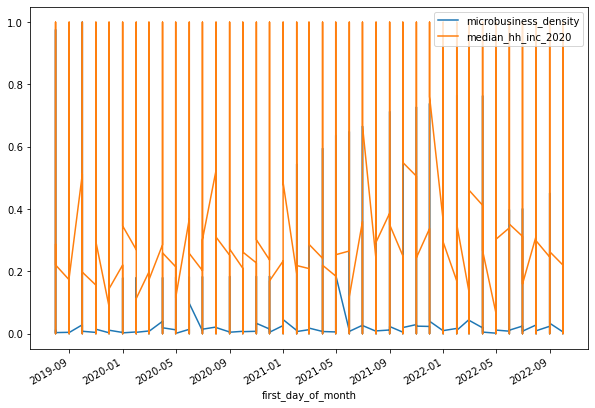

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(mbd_series[['microbusiness_density','median_hh_inc_2020']]), # we need to scale the data first
                                     columns=mbd_series.columns,
                                     index=mbd_series.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [ ]:
# Setup dataset hyperparameters
WINDOW_SIZE = 7
HORIZON = 1
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

In [ ]:
# Make a copy of the Bitcoin historical data with block reward feature
mbd_series_windowed = mbd_series.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  mbd_series_windowed[f"microbusiness_density+{i+1}"] = mbd_series_windowed["microbusiness_density"].shift(periods=i+1)
mbd_series_windowed.head(10)

,microbusiness_density,median_hh_inc_2020,microbusiness_density+1,microbusiness_density+2,microbusiness_density+3,microbusiness_density+4,microbusiness_density+5,microbusiness_density+6,microbusiness_density+7
first_day_of_month,,,,,,,,,
2019-08-01,3.007682,57982.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,2.884870,57982.0,3.007682,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-01,3.055843,57982.0,2.884870,3.007682,NaN,NaN,NaN,NaN,NaN
2019-11-01,2.993233,57982.0,3.055843,2.884870,3.007682,NaN,NaN,NaN,NaN
2019-12-01,2.993233,57982.0,2.993233,3.055843,2.884870,3.007682,NaN,NaN,NaN
2020-01-01,2.969090,57982.0,2.993233,2.993233,3.055843,2.884870,3.007682,NaN,NaN
2020-02-01,2.909326,57982.0,2.969090,2.993233,2.993233,3.055843,2.884870,3.007682,NaN
2020-03-01,2.933231,57982.0,2.909326,2.969090,2.993233,2.993233,3.055843,2.884870,3.007682
2020-04-01,3.000167,57982.0,2.933231,2.909326,2.969090,2.993233,2.993233,3.055843,2.884870


In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = mbd_series_windowed.dropna().drop("microbusiness_density", axis=1).astype(np.float32) 
y = mbd_series_windowed.dropna()["microbusiness_density"].astype(np.float32)
X.head()

,median_hh_inc_2020,microbusiness_density+1,microbusiness_density+2,microbusiness_density+3,microbusiness_density+4,microbusiness_density+5,microbusiness_density+6,microbusiness_density+7
first_day_of_month,,,,,,,,
2020-03-01,57982.0,2.909326,2.969090,2.993233,2.993233,3.055843,2.884870,3.007682
2020-04-01,57982.0,2.933231,2.909326,2.969090,2.993233,2.993233,3.055843,2.884870
2020-05-01,57982.0,3.000167,2.933231,2.909326,2.969090,2.993233,2.993233,3.055843
2020-06-01,57982.0,3.004948,3.000167,2.933231,2.909326,2.969090,2.993233,2.993233
2020-07-01,57982.0,3.019292,3.004948,3.000167,2.933231,2.909326,2.969090,2.993233


In [ ]:
y.head()

first_day_of_month
2020-03-01    2.933231
2020-04-01    3.000167
2020-05-01    3.004948
2020-06-01    3.019292
2020-07-01    3.083837
Name: microbusiness_density, dtype: float32

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(97806, 97806, 24452, 24452)

In [ ]:
y_test.head()

first_day_of_month
2019-09-01    1.621543
2019-10-01    1.607065
2019-11-01    1.708412
2019-12-01    1.708412
2020-01-01    1.537059
Name: microbusiness_density, dtype: float32

In [ ]:
# Model Creation function was written to get the optimum learning rate

def create_uncompiled_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[WINDOW_SIZE]),
        tf.keras.layers.Conv1D(filters = 64, kernel_size=3,
                              strides =1, activation='relu',
                              padding = 'causal',
                               input_shape=[None,]
                              ),
        tf.keras.layers.LSTM(64, return_sequences = True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(10, activation =tf.nn.relu),
        tf.keras.layers.Dense(1),
            ])
    return model

In [ ]:
# adjust the learning rate function to get the optimum LR ---neednot be run again.
import keras.backend as K
def adjust_learning_rate(dataset,y):
    model = create_uncompiled_model()
    lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-7*10**(epoch / 20))
    #optimizer =  tf.keras.optimizers.Adam()
    #optimizer = tf.keras.optimizers.Adam(learning_rate= lr_schedule)
    optimizer = tf.keras.optimizers.SGD(momentum=0.9)
    # compile the model
    model.compile(loss = tf.keras.losses.Huber(),
                  optimizer = optimizer,
                  metrics = ["mae"]
                 )
    #print(K.eval(model.optimizer.lr))
    history = model.fit(dataset,y,epochs=100, callbacks=[lr_schedule])

    return history

In [ ]:
# Run the training with dynamic LR
lr_history = adjust_learning_rate(X_train,y_train)


Epoch 1/100
3057/3057 - 61s - loss: 3.2082 - mae: 3.7040
Epoch 2/100
3057/3057 - 57s - loss: 3.0961 - mae: 3.5892
Epoch 3/100
3057/3057 - 57s - loss: 3.0420 - mae: 3.5336
Epoch 4/100
3057/3057 - 57s - loss: 2.9854 - mae: 3.4751
Epoch 5/100
3057/3057 - 58s - loss: 2.9284 - mae: 3.4157
Epoch 6/100
3057/3057 - 58s - loss: 2.8691 - mae: 3.3538
Epoch 7/100
3057/3057 - 58s - loss: 2.7996 - mae: 3.2806
Epoch 8/100
3057/3057 - 58s - loss: 2.7315 - mae: 3.2078
Epoch 9/100
3057/3057 - 58s - loss: 2.6385 - mae: 3.1070
Epoch 10/100
3057/3057 - 57s - loss: 2.5566 - mae: 3.0174
Epoch 11/100
3057/3057 - 57s - loss: 2.4773 - mae: 2.9306
Epoch 12/100
3057/3057 - 59s - loss: 2.3907 - mae: 2.8355
Epoch 13/100
3057/3057 - 57s - loss: 2.2971 - mae: 2.7324
Epoch 14/100
3057/3057 - 56s - loss: 2.1941 - mae: 2.6187
Epoch 15/100
3057/3057 - 56s - loss: 2.0910 - mae: 2.5046
Epoch 16/100
3057/3057 - 56s - loss: 1.9887 - mae: 2.3915
Epoch 17/100
3057/3057 - 56s - loss: 1.8903 - mae: 2.2843
Epoch 18/100
3057/3057 

(1e-08, 0.001, 0.0, 50.0)

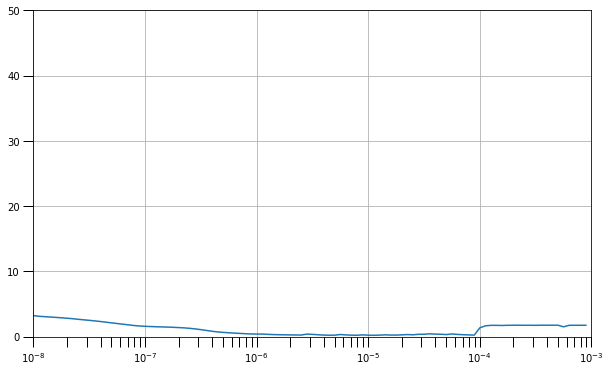

In [ ]:
# Define the learning rate array
lrs = 1e-8 * (10 ** (np.arange(100) / 20))

# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, lr_history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-8, 1e-3, 0, 50])

0.18723483383655548
1.122018454301963e-05 0.18723483383655548


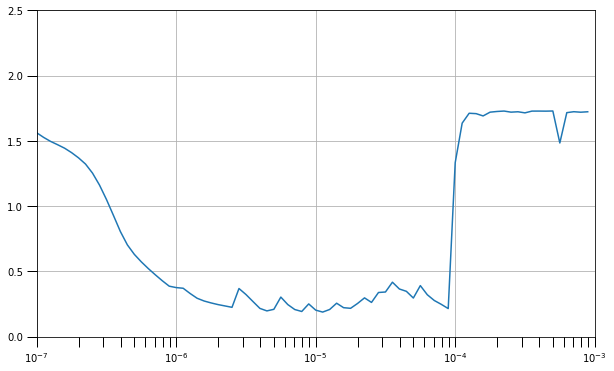

In [ ]:
#zoom on the learning rate
# Set the figure size
plt.figure(figsize=(10, 6))

# Set the grid
plt.grid(True)

# Plot the loss in log scale
plt.semilogx(lrs, lr_history.history["loss"])

# Increase the tickmarks size
plt.tick_params('both', length=10, width=1, which='both')

# Set the plot boundaries
plt.axis([1e-7, 1e-3, 0, 2.5])

print (min(lr_history.history["loss"]))

min_y = min(lr_history.history["loss"])  # Find the min y value
min_x = lrs[lr_history.history["loss"].index(min_y)]  # Find the x value corresponding to the min y value
print (min_x, min_y)

In [ ]:
#run the model with selected learning rate
model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[WINDOW_SIZE]),
        tf.keras.layers.Conv1D(filters = 64, kernel_size=3,
                              strides =1, activation='relu',
                              padding = 'causal',
                               input_shape=[None,]
                              ),
        tf.keras.layers.LSTM(64, return_sequences = True),
        tf.keras.layers.LSTM(64),
        tf.keras.layers.Dense(10, activation =tf.nn.relu),
        tf.keras.layers.Dense(1),
            ], name="model_conv1D")
    
# Set the learning rate
learning_rate = 1.122018454301963e-05

# Set the optimizer 
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)

# Set the training parameters
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

#train the model
model.fit(X_train,
            y_train,
            batch_size=32, 
            epochs=100,
            verbose=2,
            validation_data=(X_test, y_test)
            )


2023-02-09 03:13:24.846230: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-09 03:13:25.663765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
3057/3057 - 69s - loss: 1.6616 - mae: 2.0679 - val_loss: 1.5503 - val_mae: 1.9546
Epoch 2/100
3057/3057 - 64s - loss: 1.1850 - mae: 1.5704 - val_loss: 1.1496 - val_mae: 1.5058
Epoch 3/100
3057/3057 - 66s - loss: 0.8157 - mae: 1.0934 - val_loss: 0.7904 - val_mae: 1.0032
Epoch 4/100
3057/3057 - 63s - loss: 0.6070 - mae: 0.7837 - val_loss: 0.6589 - val_mae: 0.8439
Epoch 5/100
3057/3057 - 63s - loss: 0.5227 - mae: 0.6989 - val_loss: 0.5873 - val_mae: 0.7746
Epoch 6/100
3057/3057 - 63s - loss: 0.4785 - mae: 0.6623 - val_loss: 0.5619 - val_mae: 0.7631
Epoch 7/100
3057/3057 - 64s - loss: 0.4422 - mae: 0.6301 - val_loss: 0.4916 - val_mae: 0.6693
Epoch 8/100
3057/3057 - 64s - loss: 0.3884 - mae: 0.5486 - val_loss: 0.4363 - val_mae: 0.5932
Epoch 9/100
3057/3057 - 66s - loss: 0.3535 - mae: 0.5017 - val_loss: 0.4013 - val_mae: 0.5507
Epoch 10/100
3057/3057 - 65s - loss: 0.3203 - mae: 0.4507 - val_loss: 0.3638 - val_mae: 0.5004
Epoch 11/100
3057/3057 - 66s - loss: 0.3021 - mae: 0.4218 -

In [ ]:
model.evaluate(X_test, y_test)

765/765 [==============================] - 6s 8ms/step - loss: 0.1623 - mae: 0.2712


[0.16231295466423035, 0.27116939425468445]

In [ ]:
# Make predictions on multivariate data
model_preds=[]
model_preds = tf.squeeze(model.predict(X_test))
model_preds[:10]
y[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.756321 , 1.6707252, 1.6714149, 1.7210119, 1.7386657, 1.6764959,
       1.5385565, 1.5340298, 1.519493 , 1.5383805], dtype=float32)>

In [ ]:
#evaluate the MAE and MSE
#tf.squeeze - # return 1D array of predictions
print(tf.keras.metrics.mean_squared_error(tf.squeeze(y_test), model_preds).numpy())
print(tf.keras.metrics.mean_absolute_error(tf.squeeze(y_test), model_preds).numpy())

5.026063
0.27116942


In [ ]:
#predict_data = pd.DataFrame(test_data([[test_data['first_day_of_month']]))
test_data.set_index(pd.to_datetime(test_data['first_day_of_month']), inplace=True)

AttributeError: 'NoneType' object has no attribute 'set_index'

In [ ]:
#First we have to convert it to datetime object.

test_data['first_day_of_month'] = pd.to_datetime(test_data['first_day_of_month']).dt.tz_localize(None)
#After that we have to convert datetime object to float value using timestamp() function

for i in range(len(test_data)):
  test_data['first_day_of_month'][i]=test_data['first_day_of_month'][i].timestamp()
#After that we can convert the values to float.

test_data['first_day_of_month'] = test_data['first_day_of_month'].astype('float32')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
my_model_preds=[]
my_model_preds = tf.squeeze(model.predict(test_data['first_day_of_month']))
my_model_preds[:10]


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.6384661, 0.6384661, 0.6384661, 0.6384661, 0.6384661, 0.6384661,
       0.6384661, 0.6384661, 0.6384661, 0.6384661], dtype=float32)>

In [ ]:
#submission["microbusiness_density"] = test['microbusiness_density'].values
df = pd.DataFrame(data=my_model_preds)
df.to_csv("submission.csv", index=False)